In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plt
import numpy as np
import seaborn as sns

from IPython.display import display, HTML

# Assuming that dataframes are already defined:

#display(df1)
#display(HTML(df2.to_html()))

data = pd.read_excel(r'/Users/kristerlansing/Desktop/strukturdaten_wahlkreise_2017.xlsx',index_col=0)
#demographische information in wahlkreis, alter, migration, einkommen, bildungsniveau

wahlkreis=pd.DataFrame(data)
wahlkreis=wahlkreis.sort_values('wahlkreis_name',axis=0)

stimmen_daten = pd.read_excel(r'/Users/kristerlansing/Desktop/wahlkreise_stimmen.xlsx', sheet_name= 'raffiniert', index_col=0)
stimmen_je_partei=pd.DataFrame(stimmen_daten)
total_zu_wk=stimmen_je_partei[['total_zs']]
"""parties that are considered right wing are afd, npd, cdu & csu + fdp while the left wing voting bloc comprises of greens, 
linke, freie wähler, piraten & sdp"""

stimmen_je_partei['rp_total'] = stimmen_je_partei.iloc[:, [1, 5, 6, 7, 9]].sum(axis=1)
stimmen_je_partei['lp_total'] = stimmen_je_partei.iloc[:, [2,3,4,8,10]].sum(axis=1)

display(stimmen_je_partei)

total_zweitstimmen=pd.Series(stimmen_je_partei.iloc[:, 0])
total_linke= pd.Series(stimmen_je_partei.iloc[:, -1])
total_rechte=pd.Series(stimmen_je_partei.iloc[:, -2])

prozent_linke = (total_linke/total_zweitstimmen) * 100
prozent_rechte = (total_rechte/total_zweitstimmen) * 100
prozent_linke = prozent_linke.rename_axis("Bevölkerungsanteil der linken Wähler")
prozent_rechte = prozent_rechte.rename_axis("Bevölkerungsanteil der rechten Wähler")

"""for the items in each cumulative of percent/pop voting nominally left (prozent_linke) and percent/pop
voting norminally right (prozent_rechte), there has to be a cut-off point (I'm thinking 40%) where I assign 
a boolean value to reflect right wing tendency (>45%) and then left wing tendencies (=<40% of rightwing)



"""
prozent_waehler_wk = pd.concat([prozent_linke, prozent_rechte], axis=1)    
prozent_waehler_wk=prozent_waehler_wk.rename(columns={0:"Anteil der linken Wähler", 1:"Anteil der rechten Wähler"})




#rechte_neigung = pd.cut(prozent_waehler_wk['Anteil der rechten Wähler'], [25, 45, 50, 80], labels=['<45%', '45-60%', '>=60%'], include_lowest=True)


,total_zs,cdu_zs,spd_zs,linke_zs,gruenen_zs,csu_zs,fdp_zs,afd_zs,piraten_zs,npd_zs,fw_zs,rp_total,lp_total
Aachen I,170465,58320.0,40388,14002,22304,NaN,18955,11653,NaN,349.0,1195,89277.0,77889.0
Aachen II,138071,52928.0,31120,8589,15144,NaN,18050,9030,NaN,301.0,867,80309.0,55720.0
Aalen – Heidenheim,130878,47366.0,29756,8732,12960,NaN,17298,11180,NaN,471.0,1002,76315.0,52450.0
Ahrweiler,156267,56585.0,35766,9962,19337,NaN,19071,11578,NaN,307.0,1031,87541.0,66096.0
Altmark,152069,40736.0,36208,15546,26143,NaN,17804,10504,NaN,250.0,540,69294.0,78437.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worms,137727,52284.0,19446,7061,15798,NaN,18394,18814,590.0,519.0,1018,90011.0,43913.0
Wuppertal I,145430,41394.0,38322,21669,11748,NaN,11753,14042,842.0,933.0,1048,68122.0,73629.0
Würzburg,157605,52981.0,42476,20320,8598,NaN,12059,15506,799.0,748.0,1243,81294.0,73436.0
Zollernalb – Sigmaringen,138698,50660.0,38368,15686,6662,NaN,9569,12627,648.0,646.0,1261,73502.0,62625.0


,bevoelkerung,unter_18,zwischen_18_24,zwischen_25_34,zwischen_35_59,zwischen_60_75,ueber_75,ohne_migration,mit_migration,einkommen_je_einwohner,berufliche_absolventen,allgemeine_absolventen,ohne_hpts,mit_hpts,mit_m_htps,gebildet
wahlkreis_name,,,,,,,,,,,,,,,,
Aachen I,245.9,13.9,14.6,18.3,30.0,13.6,9.6,75.4,24.6,19652,2.6,11.2,5.1,15.4,36.7,42.9
Aachen II,308.0,17.0,7.9,11.1,36.3,16.8,10.9,75.4,24.6,19652,2.6,11.2,5.1,15.4,36.7,42.9
Aalen – Heidenheim,303.8,17.6,8.4,12.0,35.4,15.6,11.0,76.8,23.2,22109,5.2,12.9,4.8,21.2,46.6,27.4
Ahrweiler,246.4,15.8,7.6,10.8,36.5,17.4,11.9,83.9,16.1,22014,2.1,10.2,4.5,21.0,41.4,33.1
Altmark,201.4,14.9,4.8,11.5,37.5,18.8,12.5,97.1,2.9,17755,2.1,8.7,11.0,10.7,49.2,29.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worms,284.1,17.3,7.8,11.4,37.7,16.4,9.5,79.7,20.3,22393,1.4,10.5,4.7,17.5,45.0,32.8
Wuppertal I,308.6,16.5,8.4,13.1,35.1,15.8,11.2,68.2,31.8,20746,3.3,10.8,6.2,19.0,35.8,39.1
Würzburg,285.3,14.7,9.9,15.0,34.0,15.6,10.7,83.7,16.3,23105,4,9.4,6.2,15.9,44.5,33.4


,Anteil der linken Wähler,Anteil der rechten Wähler,farben
Aachen I,45.692078,52.372628,purple
Aachen II,40.356049,58.165002,purple
Aalen – Heidenheim,40.075490,58.310029,purple
Ahrweiler,42.296838,56.020145,purple
Altmark,51.579875,45.567473,purple
...,...,...,...
Worms,31.884090,65.354651,red
Wuppertal I,50.628481,46.841780,purple
Würzburg,46.594968,51.580851,purple
Zollernalb – Sigmaringen,45.152057,52.994275,purple


                          bevoelkerung
wahlkreis_name                        
Aachen I                         245.9
Aachen II                        308.0
Aalen – Heidenheim               303.8
Ahrweiler                        246.4
Altmark                          201.4
...                                ...
Worms                            284.1
Wuppertal I                      308.6
Würzburg                         285.3
Zollernalb – Sigmaringen         249.1
Zwickau                          251.1

[299 rows x 1 columns]
max: bevoelkerung    377.4
dtype: float64 mean: bevoelkerung    274.833779
dtype: float64 min bevoelkerung    197.6
dtype: float64


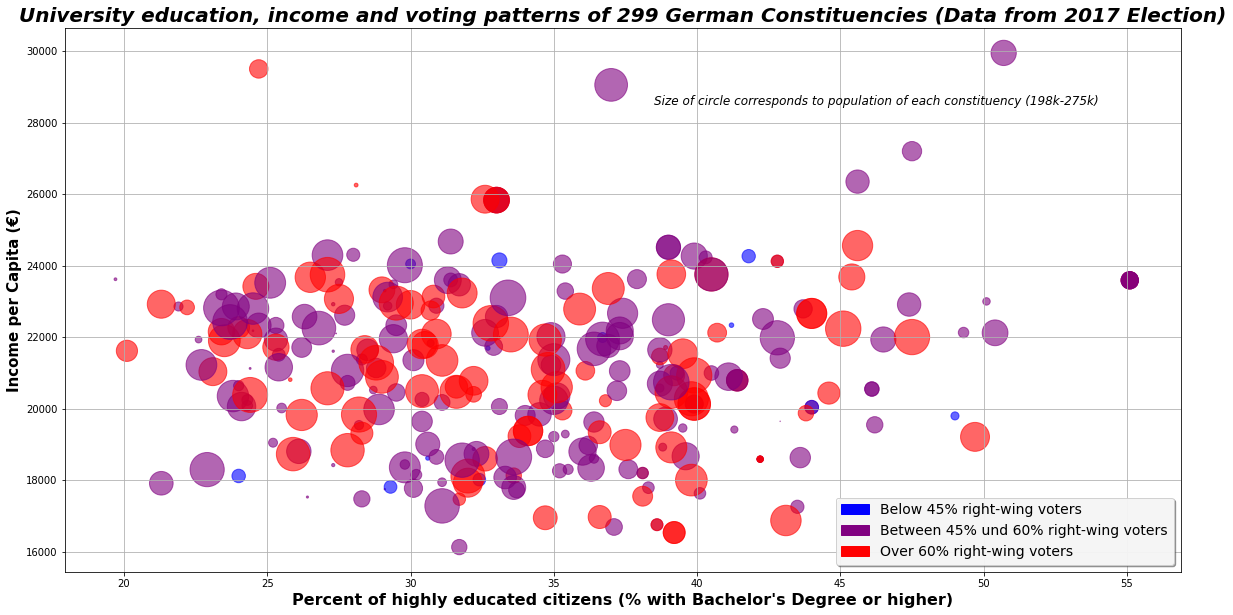

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
from IPython.display import display, HTML

data = pd.read_excel(r'/Users/kristerlansing/Desktop/strukturdaten_wahlkreise_2017.xlsx',index_col=0)
#demographische information in wahlkreis, alter, migration, einkommen, bildungsniveau

wahlkreis=pd.DataFrame(data)
wahlkreis=wahlkreis.sort_values('wahlkreis_name',axis=0)


einkommen = wahlkreis['einkommen_je_einwohner']
bildung = wahlkreis['gebildet']
bevoelkerung=wahlkreis['bevoelkerung']
#print(gebildet)
display(wahlkreis)
#display(rechte_neigung)
#how to make a DataFrame below 
"""what will go into this dataframe: on the x-axis = income, y=axis is education level 
x= einkommen_je_eiwohner 
labels, labels, 

y= gebildet/bevolkerung = Prozent Wert für jedem Wahlkreis 

pop_series is the list of ints for the size of the dots of each constituency 

blue or red is >40% right wing and <40% right wing

CSU, AfD, NSD, FDP = rechts 
SPD, Linke, Grüne = links
Zweitstimmen sind für die Partei 



"""
#pd.DataFrame(data=d)

pop_dataframe = pd.DataFrame(wahlkreis['bevoelkerung'])

politische_farben=[]
for x in prozent_waehler_wk['Anteil der rechten Wähler']:
    if 30 < x <=45:
        politische_farben.append('blue')
    elif 45 < x <=60:
        politische_farben.append('purple')
    else:
        politische_farben.append('red')
prozent_waehler_wk['farben'] = politische_farben
display(prozent_waehler_wk)
print(pop_dataframe)
print('max:', pop_dataframe.max(), 'mean:', pop_dataframe.mean(),'min', pop_dataframe.min())

# the array of wahlkreis populations to show         
s_argument_dots = np.array(pop_dataframe["bevoelkerung"])
s_argument_dots=s_argument_dots.astype(int)


#zugeo_pop=pd.cut(s_argument_dots, bins=[190, 250, 300, 400], labels=['<250k', '250-300k', '>300k'])
#colors = {'<250k':'blue', '250-300k':'purple', '>300k':'red' } 


s_squared=[n**1.5 for n in range(len(s_argument_dots))]

#print("The max and min population of the German constiuencies are %6.2f and %6.2f" % (s_argument_dots.max(), s_argument_dots.min()))


plt.figure(figsize=(20, 10))
import matplotlib.patches as mpatches
#deutsche etiketten
#purple_points = mpatches.Patch(color='purple', label='Zwischen 45% und 60% rechte Wähler')
#red_points=mpatches.Patch(color='red', label='Über 60% rechte Wähler')
#blue_points=mpatches.Patch(color='blue', label='Unter 45% rechte Wähler')
purple_points = mpatches.Patch(color='purple', label='Between 45% und 60% right-wing voters')
red_points=mpatches.Patch(color='red', label='Over 60% right-wing voters')
blue_points=mpatches.Patch(color='blue', label='Below 45% right-wing voters')

plt.legend(handles=[blue_points,purple_points,red_points], loc='lower right', fancybox=True,
framealpha=0.9, shadow=True, fontsize=14, facecolor='white')

plt.scatter(bildung, einkommen, s=s_squared, c=politische_farben, marker='.', alpha=0.6)

#plt.ylabel('Einkommen je nach Einwohner (€)', fontsize=15, fontweight='semibold')
#plt.xlabel('Prozent hochgebildeter Bürger in Wahlkreis (% mit Bachelors oder höher)', fontsize=16, fontweight='semibold')
#plt.title('Universitätsbildungsnivaeu, Einkommen, und Abstimmungsmuster in 299 deutschen Wahlkreisen (Daten von Wahl 2017)', fontweight='bold', fontstyle='italic', fontsize=20)
#English labels
plt.ylabel('Income per Capita (€)', fontsize=15, fontweight='semibold')
plt.xlabel("Percent of highly educated citizens (% with Bachelor's Degree or higher)", fontsize=16, fontweight='semibold')
plt.title('University education, income and voting patterns of 299 German Constituencies (Data from 2017 Election)', fontweight='bold', fontstyle='italic', fontsize=20)

#labels for left, right wing designations neeeded
#population explanation needed side of graph
#normalize argument can only be used if s is a series of floats
#English label 
plt.text(54, 28500, s='Size of circle corresponds to population of each constituency (198k-275k)', fontstyle='italic', fontsize='12', fontweight='normal', horizontalalignment='right')

#plt.text(54, 28500, s='Kreisgröße entspricht der Bevölkerung jedes Wahlkreises', fontstyle='italic', fontsize='12', fontweight='normal', horizontalalignment='right')
plt.grid(True)
plt.show()

In [7]:
farben=[]

for x in pop_dataframe['bevoelkerung']:
    if x <= 250:
        farben.append('blue')
    elif 300 <= x > 250:
        farben.append('purple')
    else:
        farben.append('red')

        
pop_dataframe['farben'] = farben 
    

print(pop_dataframe)
    

                          bevoelkerung  farben
wahlkreis_name                                
Aachen I                         245.9    blue
Aachen II                        308.0  purple
Aalen – Heidenheim               303.8  purple
Ahrweiler                        246.4    blue
Altmark                          201.4    blue
...                                ...     ...
Worms                            284.1     red
Wuppertal I                      308.6  purple
Würzburg                         285.3     red
Zollernalb – Sigmaringen         249.1    blue
Zwickau                          251.1     red

[299 rows x 2 columns]
